##### [09: 图像混合](https://codec.wang/docs/opencv/basic/image-blending)

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']  # 使用文泉驿字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题


##### 图片相加

要叠加两张图片，可以用cv2.add()函数，相加两幅图片的形状（高度/宽度/通道数）必须相同。numpy 中可以直接用 res = img + img1 相加，但这两者的结果并不相同：

In [2]:
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x, y))  # 250+10 = 260 => 255
print(x + y)  # 250+10 = 260 % 256 = 4

[[260.]
 [  0.]
 [  0.]
 [  0.]]
[4]


(<Axes: >, <matplotlib.image.AxesImage at 0x7fc84f98a570>)

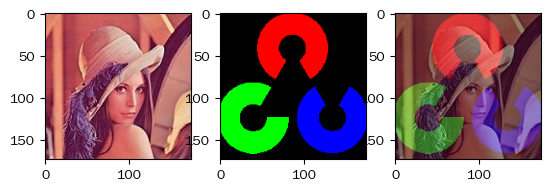

In [6]:
img1 = cv2.imread('./images/lena_small.jpg')
img2 = cv2.imread('./images/opencv-logo-white.png')
res = cv2.addWeighted(img1,0.6,img2,0.4,0)

plt.subplot(131),plt.imshow(img1[:,:,::-1])
plt.subplot(132),plt.imshow(img2[:,:,::-1])
plt.subplot(133),plt.imshow(res[:,:,::-1])

(<Axes: >, <matplotlib.image.AxesImage at 0x7fc84d1577a0>)

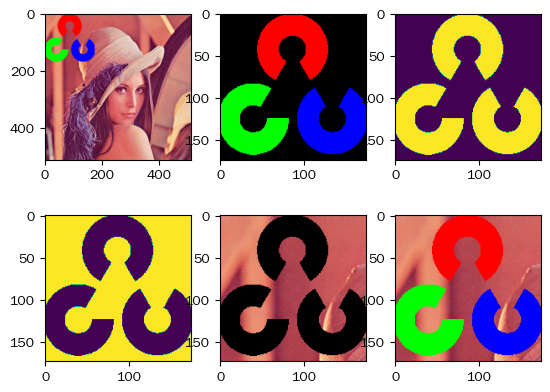

In [11]:
img1 = cv2.imread('images/lena.png')
img2 = cv2.imread('images/opencv-logo-white.png')

# 把 logo 放在左上角，所以我们只关心这一块区域
rows, cols = img2.shape[:2]
roi = img1[:rows,:cols]

# 创建掩膜
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(img2gray,10,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# 保留除 logo 外的背景
img1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
dst = cv2.add(img1_bg,img2) # 进行整合
img1[:rows,:cols] = dst # 整合后放在原图上

plt.subplot(231),plt.imshow(img1[:,:,::-1])
plt.subplot(232),plt.imshow(img2[:,:,::-1])
plt.subplot(233),plt.imshow(mask)
plt.subplot(234),plt.imshow(mask_inv)
plt.subplot(235),plt.imshow(img1_bg[:,:,::-1])
plt.subplot(236),plt.imshow(dst[:,:,::-1])

##### 双边滤波
模糊操作基本都会损失掉图像细节信息，尤其前面介绍的线性滤波器，图像的边缘信息很难保留下来。然而，边缘（edge）信息是图像中很重要的一个特征，所以这才有了双边滤波。用cv2.bilateralFilter()函数实现：

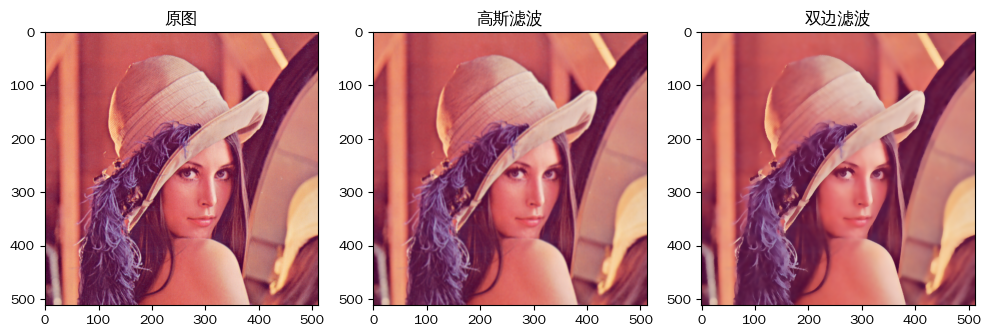

In [22]:
strsrc = './images/lena.png'
img = cv2.imread(strsrc)
# 双边滤波 vs 高斯滤波
gau = cv2.GaussianBlur(img, (5, 5), 0)  # 高斯滤波
blur = cv2.bilateralFilter(img, 9, 75, 75)  # 双边滤波
plt.figure(figsize=(12,8))
plt.subplot(131),plt.imshow(img[:,:,::-1]),plt.title('原图')
plt.subplot(132),plt.imshow(gau[:,:,::-1]),plt.title('高斯滤波')
plt.subplot(133),plt.imshow(blur[:,:,::-1]),plt.title('双边滤波')

plt.show()